In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.9 MB 12.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.8/10.9 MB 8.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.9 MB 6.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.9 MB 6.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.9 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.9 MB 5.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.9 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/10.9 MB 4.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.9 MB 4.8 MB/s eta 0:00:02
   -


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [12]:
df=pd.read_csv("D:/archive/onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [14]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
df["type"] = df["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df=df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'])
df.head()

C:\Users\aparu\AppData\Local\Temp\ipykernel_20424\4181461969.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["type"] = df["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0


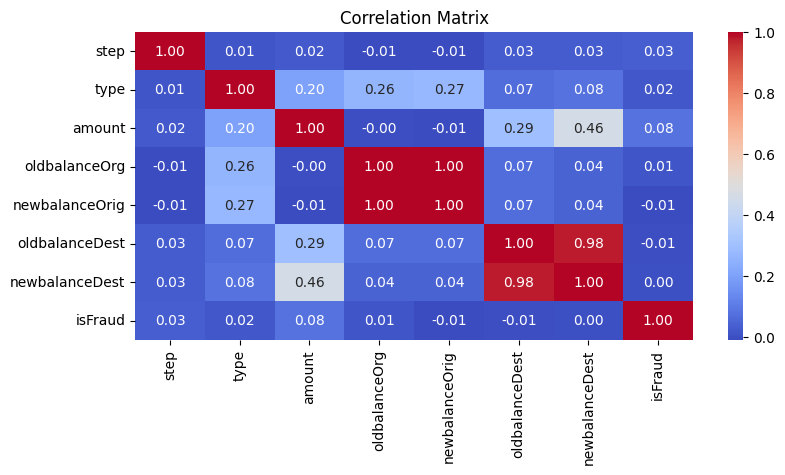

In [16]:
corr=df.corr()
plt.figure(figsize=(9,4))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df=df.drop(columns=['oldbalanceOrg','oldbalanceDest'])
df.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,1,2,9839.64,160296.36,0.0,0
1,1,2,1864.28,19384.72,0.0,0
2,1,4,181.00,0.00,0.0,1
3,1,1,181.00,0.00,0.0,1
4,1,2,11668.14,29885.86,0.0,0


In [18]:
# spliting data into train_test_split
x=df.loc[:, df.columns!='isFraud']
y=df['isFraud']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, stratify=df['isFraud'], random_state=1)
print(len(df),len(x_train),len(y_test))

6362620 5090096 1272524


In [19]:
# training model 1
tree=DecisionTreeClassifier(random_state=0, criterion="entropy")
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
# testing model 1
y_pred=tree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.72      0.71      0.71      1643

    accuracy                           1.00   1272524
   macro avg       0.86      0.86      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



In [21]:
# this cell will take multiple minutes to run all params combinations

import warnings # ignoring Future Python versions Warnings
warnings.filterwarnings("ignore", category=FutureWarning)

param_grid = {'max_features': ['auto', 'sqrt'],
              'ccp_alpha': [.01, .001],
              'max_depth' : [5, 6],
              'criterion' :['gini', 'entropy']
             }
grid = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, verbose=True)
grid.fit(x_train, y_train)
print(grid.best_params_)
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\aparu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aparu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aparu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\aparu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.71      0.24      0.35      1643

    accuracy                           1.00   1272524
   macro avg       0.85      0.62      0.68   1272524
weighted avg       1.00      1.00      1.00   1272524



In [22]:
forest=RandomForestClassifier(n_estimators = 10)
forest.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [23]:
y_pred2=forest.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.94      0.68      0.79      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.84      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

